In [ ]:
from autoencoder import Autoencoder
from parser import data_converter, print_letter
import numpy as np
import matplotlib.pyplot as plt
from compare_architectures import sample_set

In [ ]:
testing_set = list()
training_set = None
for i in [1]:
        labels, alphabet = data_converter("resources/fonts_" + str(i) + ".txt")
        alphabet = np.array(alphabet)
        flattened_input = np.array(list(map(lambda char: np.array(char).flatten(), alphabet)))
        if training_set is None:
                training_set = flattened_input
        else:
                training_set = np.concatenate(training_set, sample_set(flattened_input, 0.5))
        testing_set.append(list(zip(labels, flattened_input)))

# for char in alphabet:
#     print_letter(char)
# print(len(alphabet))


In [ ]:
epochs = []
errors =[]

def callback_fun(e, error, w, o):
    epochs.append(e)
    errors.append(error)

In [ ]:

activation_function = (lambda x: 1/(1+np.exp(-2*x)))
activation_derivative = (lambda x: 2*(1/(1+np.exp(-2*x)))*(1-(1/(1+np.exp(-2*x)))) )
ae = Autoencoder(35, [], latent_dim=2, activation_function=activation_function,activation_function_derivative=activation_derivative, update_learn_rate=None, learning_rate=0.001, update_frequency=0,momentum=False, use_adam=False)


output, err_min = ae.train(training_set, expected_output=training_set, epoch_limit=100, callback=callback_fun)

test_error = ae.test_autoencoder(testing_set[0])
print(test_error)
plt.plot(epochs, errors)

In [ ]:
epochs = []
errors =[]
ae = Autoencoder(35, [], latent_dim=2, activation_function=activation_function,activation_function_derivative=activation_derivative, update_learn_rate=None, learning_rate=0.001, update_frequency=len(training_set),momentum=False, use_adam=False)


output, err_min = ae.train(training_set, expected_output=training_set, epoch_limit=100, callback=callback_fun)

test_error = ae.test_autoencoder(testing_set[0])
print(test_error)
plt.plot(epochs, errors)

In [ ]:
epochs = []
errors =[]
ae = Autoencoder(35, [], latent_dim=2, activation_function=activation_function,activation_function_derivative=activation_derivative, update_learn_rate=None, learning_rate=0.001, update_frequency=len(training_set),momentum=True, use_adam=False)


output, err_min = ae.train(training_set, expected_output=training_set, epoch_limit=100, callback=callback_fun)

test_error = ae.test_autoencoder(testing_set[0])
print(test_error)
plt.plot(epochs, errors)

In [ ]:
epochs = []
errors =[]
ae = Autoencoder(35, [], latent_dim=2, activation_function=activation_function,activation_function_derivative=activation_derivative, update_learn_rate=None, learning_rate=0.001, update_frequency=0,momentum=True, use_adam=False)


output, err_min = ae.train(training_set, expected_output=training_set, epoch_limit=100, callback=callback_fun)

test_error = ae.test_autoencoder(testing_set[0])
print(test_error)
plt.plot(epochs, errors)

In [ ]:
epochs = []
errors =[]
def update_learning_rate(lr, error_k):
    if error_k> 0 and  error_k % 3 == 0:
        return lr +0.1
    elif error_k < 0 and error_k % 3 == 0:
        return lr -0.01*lr
    else:
        return lr

ae = Autoencoder(35, [], latent_dim=2, activation_function=activation_function,activation_function_derivative=activation_derivative, update_learn_rate=update_learning_rate, learning_rate=0.001, update_frequency=0,momentum=False, use_adam=False)


output, err_min = ae.train(training_set, expected_output=training_set, epoch_limit=100, callback=callback_fun)

test_error = ae.test_autoencoder(testing_set[0])
print(test_error)
plt.plot(epochs, errors)

In [ ]:
# i = 10
# print_letter(alphabet[i])
# reconstruct, reconstruction_error = ae.reconstruct(flattened_input[i])

# print_letter(reconstruct.reshape(alphabet[i].shape))
# print(reconstruction_error)

# latent_output = ae.encode(flattened_input[i])
# print(latent_output)
# print_letter(ae.decode(latent_output).reshape(alphabet[i].shape))

# ae.graph_latent_space(flattened_input)



In [ ]:
from compare_architectures import compare_architectures
compare_architectures()

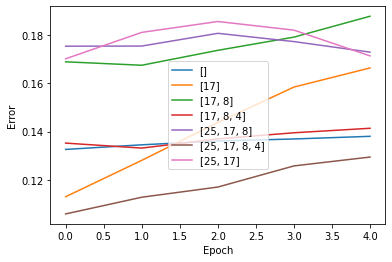

In [1]:
from parser import parse_config
from compare_architectures import graph_evolution, graph_latent_space, graph_comp_error
config_file = parse_config("resources/config.json")
input_values = list(map(lambda a: str(a), config_file["architectures"]))
graph_evolution(0, input_values, comparing_attribute="architecture")


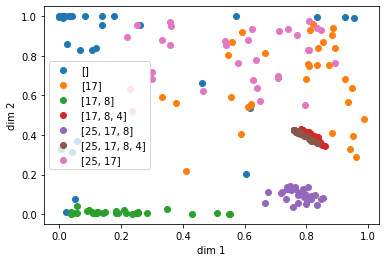

In [2]:
graph_latent_space(0, input_values, comparing_attribute="architecture")


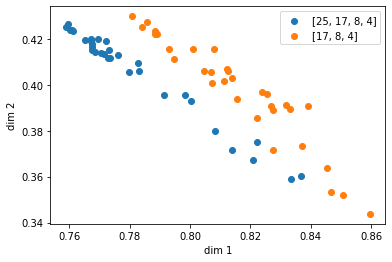

In [3]:
graph_latent_space(0, ["[25, 17, 8, 4]", "[17, 8, 4]" ], comparing_attribute="special_architecture")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


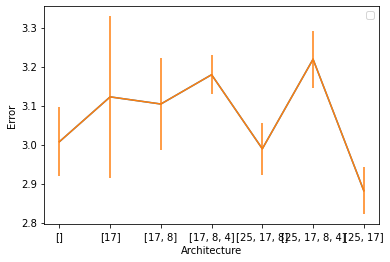

In [4]:
graph_comp_error(input_values, comparing_attribute="architecture", execution_count=2)